In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [17]:
### Part 1

In [18]:
data1_table = np.genfromtxt("resources\Patel\EM2 Part 1.csv", delimiter=',', skip_header=1)
part1 = {
    "frequency": data1_table[:,0], #hz
    "V0": data1_table[:,1],        #volts
    "Vc": data1_table[:,2],        #volts
    "phase": data1_table[:,3],     #degrees
}

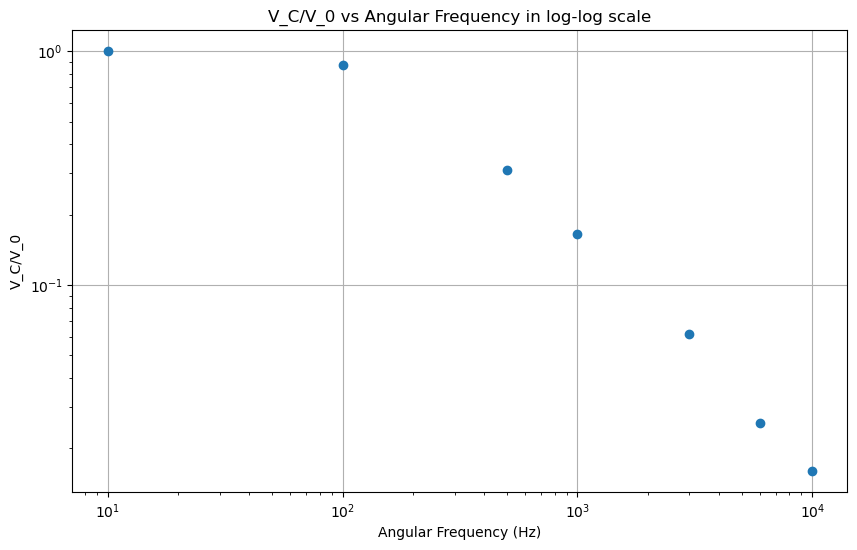

In [19]:
plt.figure(figsize=(10, 6))
plt.loglog(part1["frequency"], part1["Vc"]/part1["V0"], 'o', label="Data")
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("V_C/V_0")
plt.title("V_C/V_0 vs Angular Frequency in log-log scale")
plt.grid()
plt.show()

In [20]:
def curve_part_1(w, A, tau):
    return A / np.sqrt(1 + (w**2) * (tau**2))

In [28]:
popt, pcov = curve_fit(curve_part_1, part1["frequency"], part1["Vc"]/part1["V0"])
A_opt, tau_opt = popt
A_err, tau_err = np.sqrt(np.diag(pcov))
print("Optimized parameters:")
print("A = {:.4f} +/- {:.4f}".format(A_opt, A_err))
print("tau = {:.4f} +/- {:.4f}".format(tau_opt, tau_err))

Optimized parameters:
A = 1.0088 +/- 0.0071
tau = -0.0060 +/- 0.0001


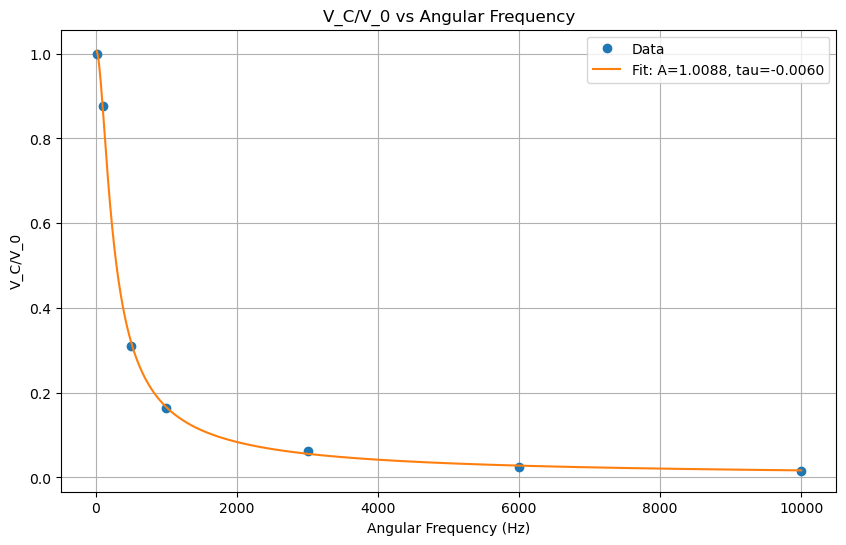

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(part1["frequency"], part1["Vc"]/part1["V0"], 'o', label="Data")
frequencies = np.linspace(min(part1["frequency"]), max(part1["frequency"]), 1000)
plt.plot(frequencies, curve_part_1(frequencies, *popt), label="Fit: A={:.4f}, tau={:.4f}".format(A_opt, tau_opt))
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("V_C/V_0")
plt.title("V_C/V_0 vs Angular Frequency")
plt.grid(True)
plt.legend()
plt.show()